In [1]:
import os
import numpy as np
import pydicom
import nibabel as nib

def load_dicom_series(dicom_folder):
    dicom_files = sorted([
        pydicom.dcmread(os.path.join(dicom_folder, f))
        for f in os.listdir(dicom_folder)
        if f.endswith(".dcm")
    ], key=lambda d: int(d.InstanceNumber))
    
    slices = [d.pixel_array for d in dicom_files]
    volume = np.stack(slices, axis=-1)  # shape: (H, W, D)
    
    # spacing (PixelSpacing[0], PixelSpacing[1], SliceThickness)
    spacing = (
        float(dicom_files[0].PixelSpacing[0]),
        float(dicom_files[0].PixelSpacing[1]),
        float(dicom_files[0].SliceThickness)
    )
    
    affine = np.diag(spacing + (1.0,))  # 4x4 affine matrix
    
    return volume, affine

dicom_folder = '../../data/stroke_2023/1.Training/1.원천데이터/0100.Ischemic Stroke'
volume, affine = load_dicom_series(dicom_folder)

nii_img = nib.Nifti1Image(volume, affine)
nib.save(nii_img, 'output_brain.nii.gz')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/stroke_2023/1.Training/1.원천데이터/0100.Ischemic Stroke'

In [2]:
import pydicom
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 1. DICOM 파일 불러오기
dcm_path = "../../data/stroke_2023/1.Training/1.원천데이터/0100.Ischemic Stroke/0130.MR Diffusion/ANO1_0001_Ischemic Stroke_MRI_DWI_018.dcm"
dcm = pydicom.dcmread(dcm_path)

# 픽셀 데이터 가져오기
img = dcm.pixel_array.astype(np.float32)

# 2. 정규화 (0~1 사이로)
img_norm = (img - np.min(img)) / (np.max(img) - np.min(img) + 1e-8)

# 시각화
plt.imshow(img_norm, cmap='gray')
plt.title("MRI with Intensity Normalization (0~1)")
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../data/stroke_2023/1.Training/1.원천데이터/0100.Ischemic Stroke/0130.MR Diffusion/ANO1_0001_Ischemic Stroke_MRI_DWI_018.dcm'

In [1]:
import os
import numpy as np
import pydicom
import nibabel as nib
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import dataset as dataset
from torchvision.transforms import Compose, ToTensor, Lambda
import torch
from torchvision.transforms import ToPILImage
img = nib.load('../../../data/stroke_mri_nii/images/ANO1_0001.nii.gz').get_fdata()
transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.unsqueeze(0)),
])

input_transform = Compose([
    Lambda(lambda t: torch.tensor(t).float()),
    Lambda(lambda t: (t * 2) - 1),
    Lambda(lambda t: t.permute(3, 0, 1, 2))
])

dataset = dataset.NiftiPairImageGenerator(
        '../../../data/stroke_ct_nii/masks/Hemorrhagic/',
        '../../../data/stroke_ct_nii/images/Hemorrhagic/',
        input_size=128,
        depth_size=64,
        transform=input_transform,
        target_transform=transform,
        full_channel_mask=True
    )
to_pil = ToPILImage()

In [3]:
dataset[0]['target'][0][17].shape

torch.Size([128, 128])

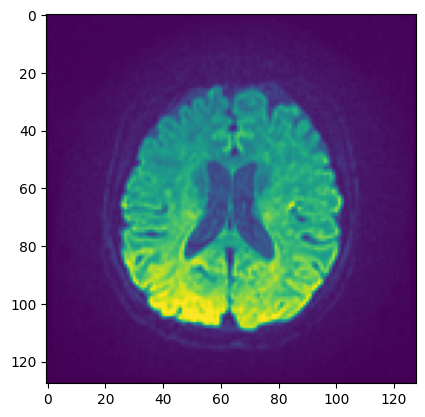

In [ ]:
plt.imshow(img[30])